# EDA For Rain Prediction 

In [84]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
import itertools
import io
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')

In [85]:
RainPred = pd.read_csv('C:/Users/sabhn/OneDrive/Desktop/KBS/Weather Prediction/cleanfile1.csv')

In [86]:
RainPred.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,01-01-2009,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48,ENE,...,2,5,26.6,33.4,No,0.0,No,2009,1,1
1,02-01-2009,Cobar,18.4,28.9,0.0,14.8,13.0,S,37,SSE,...,1,1,20.3,27.0,No,0.0,No,2009,1,2
2,04-01-2009,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46,NNE,...,1,6,28.7,34.9,No,0.0,No,2009,1,4
3,05-01-2009,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31,WNW,...,1,5,29.1,35.6,No,0.0,No,2009,1,5
4,06-01-2009,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35,NW,...,1,6,33.6,37.6,No,0.0,No,2009,1,6


In [87]:
#change object to numeric dtype
RainPred['Date'] = pd.to_datetime(RainPred['Date'])
RainPred["Date"] = pd.to_numeric(RainPred["Date"])

In [88]:
#Separating rain and non rain customers
rain     = RainPred[RainPred["RainTomorrow"] == "Yes"]
not_rain = RainPred[RainPred["RainTomorrow"] == "No"]

In [89]:
#Separating columns
Id_col     = ['Date']
target_col = ["RainTomorrow"]
cat_cols   = RainPred.nunique()[RainPred.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in RainPred.columns if x not in cat_cols + target_col + Id_col]

In [90]:
RainPred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 27 columns):
Date             56420 non-null int64
Location         56420 non-null object
MinTemp          56420 non-null float64
MaxTemp          56420 non-null float64
Rainfall         56420 non-null float64
Evaporation      56420 non-null float64
Sunshine         56420 non-null float64
WindGustDir      56420 non-null object
WindGustSpeed    56420 non-null int64
WindDir9am       56420 non-null object
WindDir3pm       56420 non-null object
WindSpeed9am     56420 non-null int64
WindSpeed3pm     56420 non-null int64
Humidity9am      56420 non-null int64
Humidity3pm      56420 non-null int64
Pressure9am      56420 non-null float64
Pressure3pm      56420 non-null float64
Cloud9am         56420 non-null int64
Cloud3pm         56420 non-null int64
Temp9am          56420 non-null float64
Temp3pm          56420 non-null float64
RainToday        56420 non-null object
RISK_MM          56420 non-null 

# EDA for Users 

 ## (i) Predicting if it'll Rain Tomorrow or no? 

In [91]:
#labels
lab = RainPred["RainTomorrow"].value_counts().keys().tolist()
#values
val = RainPred["RainTomorrow"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'lightblue' ,'red'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Rain Tomorrow data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

## (ii) Prediction of RainTomorrow with respect to RainToday

In [106]:
#function  for pie plot for rain tomorrow attrition types
def plot_pie(column) :
    
    trace1 = go.Pie(values  = rain[column].value_counts().values.tolist(),
                    labels  = rain[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Rain Tomorrow",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_rain[column].value_counts().values.tolist(),
                    labels  = not_rain[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Not Rain Tomorrow" 
                   )


    layout = go.Layout(dict(title = column + " distribution in Rain Tomorrow  ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Rain Tomorrow",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Not Rain Tomorrow",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)

    

#for all categorical columns plot pie
for i in cat_cols :
    plot_pie(i)



# EDA for Analyst 

##  Relationship between Humidity and Rain Tomorrow.

Text(0, 0.5, 'Evening Humidity')

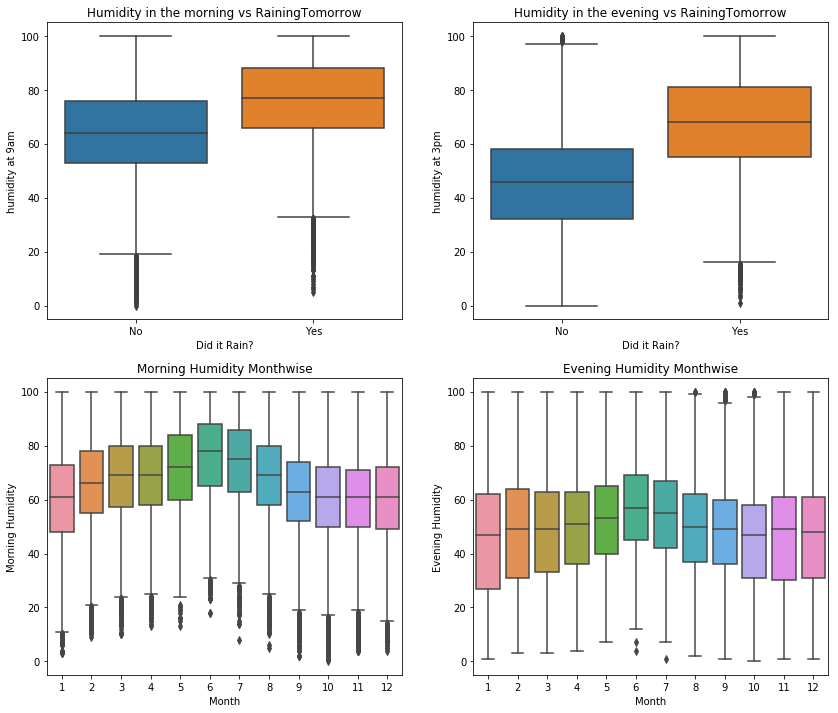

In [68]:
plt.figure(1, figsize=[14,12])
plt.subplot(2,2,1)
sns.boxplot(data=RainPred,y="Humidity9am",x="RainTomorrow")
plt.title("Humidity in the morning vs RainingTomorrow")
plt.xlabel("Did it Rain?")
plt.ylabel("humidity at 9am")

plt.subplot(2,2,2)
sns.boxplot(data=RainPred,y="Humidity3pm",x="RainTomorrow")
plt.title("Humidity in the evening vs RainingTomorrow")
plt.xlabel("Did it Rain?")
plt.ylabel("humidity at 3pm")

plt.subplot(2,2,3)
sns.boxplot(data=RainPred,y="Humidity9am",x="Month")
plt.title("Morning Humidity Monthwise")
plt.xlabel("Month")
plt.ylabel("Morning Humidity")

plt.subplot(2,2,4)
sns.boxplot(data=RainPred,y="Humidity3pm",x="Month")
plt.title("Evening Humidity Monthwise")
plt.xlabel("Month")
plt.ylabel("Evening Humidity")

### Similarly, we can obtain graphical representations for analyzing various other features like Temprature, WindGustSpeed, Pressure,Evaporation, Sunshine. 

# Corellations within the Dataset.

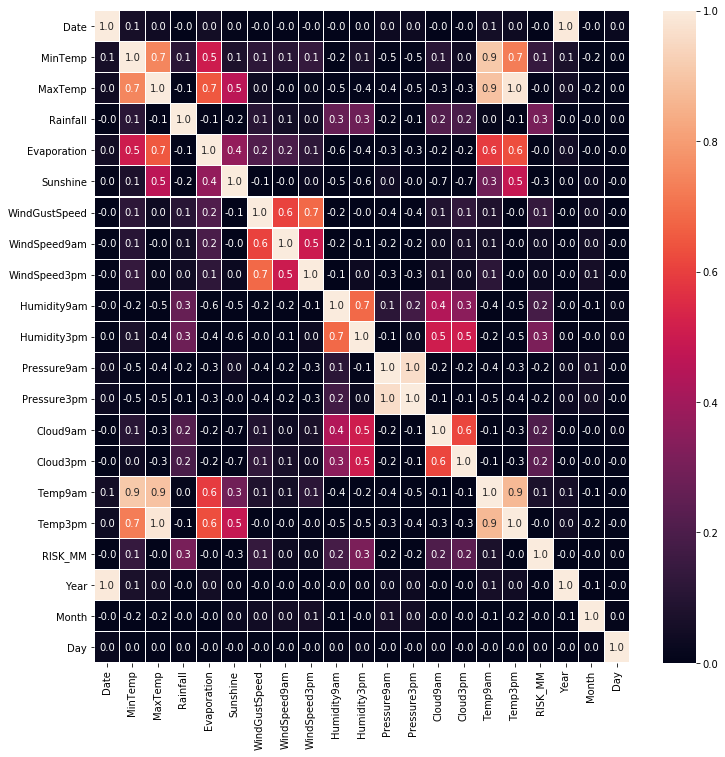

In [105]:
fig, ax = plt.subplots(figsize=[12,12])
sns.heatmap(RainPred.corr(),annot=True, linewidths=.1, fmt= '.1f', vmin=0, vmax=1, ax=ax)

## From the above Correlation Matrix, we can Conclude the following: 

(i) Maximum Temprature is highly correlated with Temprature at 3pm.

(ii) Similar correlation is observed for Temprature at 9am and Minimum Temprature.

(iii) Pressure and Temprature are Negatively correlated.

(iv) Humidity and Temprature are Negatively correlated. 